<a href="https://colab.research.google.com/github/Priyanka2508/Rating-Prediction_Sentimental-Analysis_EDA/blob/main/Guvi_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
import re
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.style.use('seaborn-pastel')


In [ ]:
df = pd.read_csv('3.1-data-sheet-guvi-courses.csv')
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,2016-03-08T22:28:36Z,Subject: Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,1216340.0,Learn to Play Sweet Child of Mine,https://www.udemy.com/learn-to-play-sweet-chil...,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,2017-06-30T17:33:29Z,Musical Instruments
3676,1026762.0,Coaching Course: Rhythm Instruction for Music ...,https://www.udemy.com/coaching-bundle-rhythm-i...,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,2017-03-10T17:06:46Z,Musical Instruments
3677,1223240.0,Learn Pirates of the Caribbean by Ear on the P...,https://www.udemy.com/learn-pirates-of-the-car...,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,2017-05-22T17:14:43Z,Musical Instruments
3678,1224186.0,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,2017-05-30T00:19:02Z,Musical Instruments


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 345.1+ KB


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3676.0,675753.495103,343130.440299,8324.0,407474.00,687692.00,960814.00,1282064.0
price,3676.0,66.115343,61.056073,0.0,20.00,45.00,95.00,200.0
num_subscribers,3676.0,3199.260881,9486.582966,0.0,112.00,912.50,2558.00,268923.0
num_reviews,3676.0,156.309848,935.674518,0.0,4.00,18.00,67.00,27445.0
num_lectures,3676.0,40.129761,50.398507,0.0,15.00,25.00,46.00,779.0
Rating,3676.0,0.610868,0.334287,0.0,0.28,0.76,0.93,1.0
content_duration,3676.0,4.096137,6.054948,0.0,1.00,2.00,4.50,78.5


In [ ]:
df['course_id'].value_counts()

241590.0     2
142666.0     2
1052304.0    2
736940.0     2
286424.0     1
            ..
165964.0     1
192870.0     1
252396.0     1
418732.0     1
1234656.0    1
Name: course_id, Length: 3672, dtype: int64

In [ ]:
df['course_id'].nunique()

3672

In [ ]:
df['subject'].nunique()
df['subject'].value_counts()

Subject: Web Development    1204
Business Finance            1191
Musical Instruments          680
Graphic Design               602
Name: subject, dtype: int64

In [ ]:
df['level'].nunique()
df['level'].value_counts()

All Levels            1925
Beginner Level        1271
Intermediate Level     422
Expert Level            58
Name: level, dtype: int64

In [ ]:
df['course_title'].value_counts()

Creating an animated greeting card via Google Slides            3
Acoustic Blues Guitar Lessons                                   3
Improved SEO with Rich Snippets and MicroData                   2
The Complete Web Developer Masterclass: Beginner To Advanced    2
How to Make a Wordpress Website 2017                            2
                                                               ..
Hedge Fund Trading System                                       1
The Complete Bitcoin Course: Get .001 Bitcoin In Your Wallet    1
The Complete Investment Banking Course 2017                     1
Dividend Investing: Build Your Portfolio for a Better Future    1
4 Week Rhythm Mastery                                           1
Name: course_title, Length: 3663, dtype: int64

In [ ]:
df['course_title'].nunique()

3663

In [ ]:
df = pd.DataFrame(df)
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])  # Convert the 'Date' column to datetime format

# Extract the year and create a new column 'Year'
df['Year'] = df['published_timestamp'].dt.year
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,Year
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,2013-02-14 07:03:41+00:00,Subject: Web Development,2013.0
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,2013-06-09 15:51:55+00:00,Subject: Web Development,2013.0
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,2015-11-02 21:13:27+00:00,Subject: Web Development,2015.0
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,2014-04-08 16:21:30+00:00,Subject: Web Development,2014.0
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,2016-03-08 22:28:36+00:00,Subject: Web Development,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,1216340.0,Learn to Play Sweet Child of Mine,https://www.udemy.com/learn-to-play-sweet-chil...,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,2017-06-30 17:33:29+00:00,Musical Instruments,2017.0
3676,1026762.0,Coaching Course: Rhythm Instruction for Music ...,https://www.udemy.com/coaching-bundle-rhythm-i...,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,2017-03-10 17:06:46+00:00,Musical Instruments,2017.0
3677,1223240.0,Learn Pirates of the Caribbean by Ear on the P...,https://www.udemy.com/learn-pirates-of-the-car...,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,2017-05-22 17:14:43+00:00,Musical Instruments,2017.0
3678,1224186.0,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,2017-05-30 00:19:02+00:00,Musical Instruments,2017.0


In [ ]:
data = df.drop(['published_timestamp','url','course_id','course_title'], axis =1)

In [ ]:
data.isna().sum()
data.dropna(inplace = True)

In [ ]:
data.isna().sum()

price               0
num_subscribers     0
num_reviews         0
num_lectures        0
level               0
Rating              0
content_duration    0
subject             0
Year                0
dtype: int64

In [ ]:
data.corr()

,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration,Year
price,1.000000,0.050555,0.113423,0.330233,0.031643,0.293245,0.134875
num_subscribers,0.050555,1.000000,0.650761,0.158092,-0.007353,0.161844,-0.182635
num_reviews,0.113423,0.650761,1.000000,0.242986,0.004137,0.228842,-0.053045
num_lectures,0.330233,0.158092,0.242986,1.000000,-0.037170,0.801630,-0.024659
Rating,0.031643,-0.007353,0.004137,-0.037170,1.000000,0.000650,0.059683
content_duration,0.293245,0.161844,0.228842,0.801630,0.000650,1.000000,-0.058449
Year,0.134875,-0.182635,-0.053045,-0.024659,0.059683,-0.058449,1.000000


<Axes: >

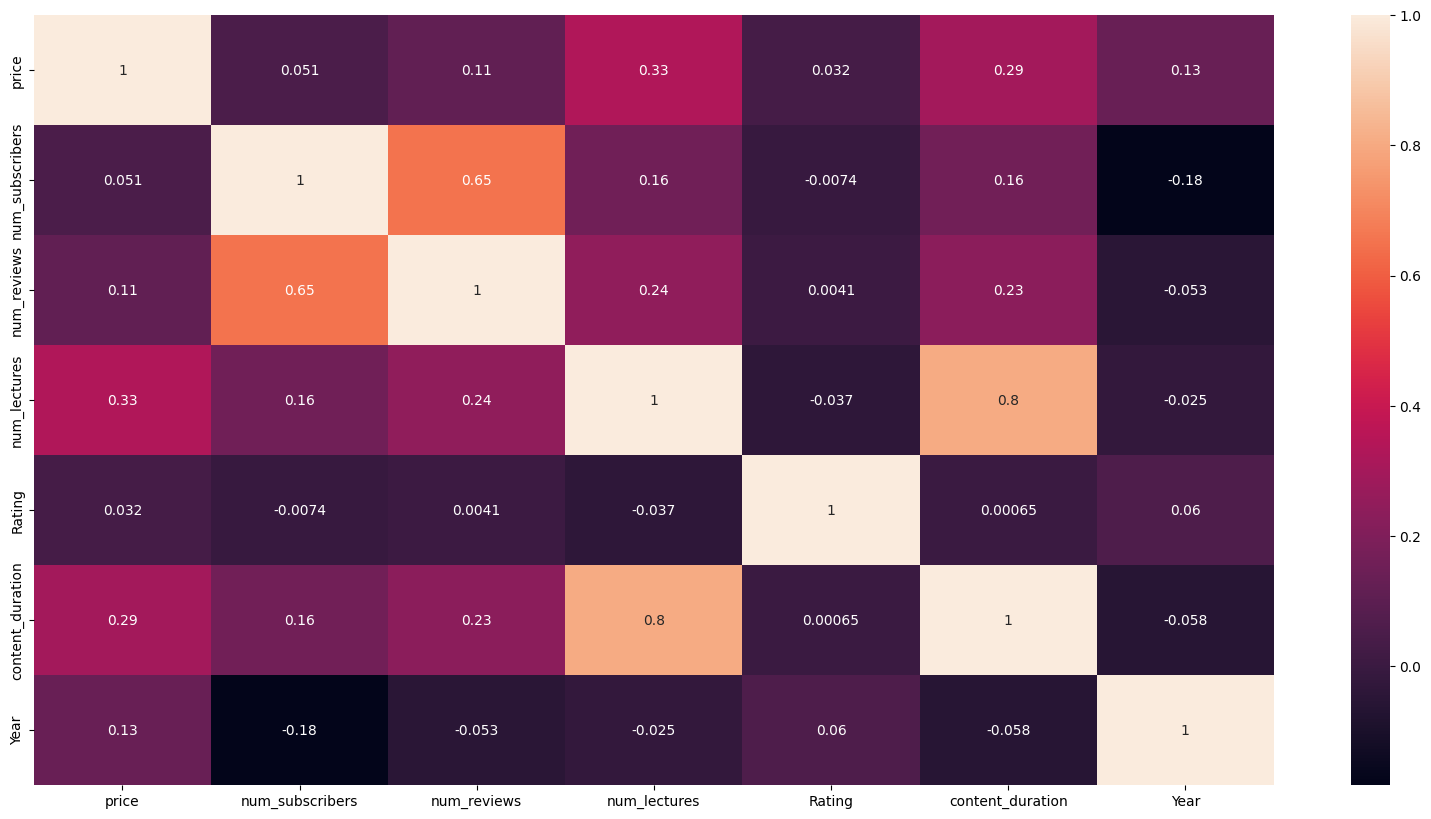

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot = True)

THe following features are coorelated with Rating (Target Variable):


*   Year (0.06)
*   course_id  (0.05)
*   num_lectures(-0.037)
*   price(0.032)

Multi collinearity is observed for the following pairs:


*   content_duration and num_lectures
*   num_subscribers and num_reviews







In [ ]:
data['Year'] = data['Year'].astype(int)

In [ ]:
data['subject'] = data['subject'].str.replace('Subject: ', '')

In [ ]:
data['subject'].value_counts()

Web Development        1203
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

In [ ]:
data

,course_id,course_title,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,Year
0,41295.0,Learn HTML5 Programming From Scratch,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,Web Development,2013.0
1,59014.0,Coding for Entrepreneurs Basic,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,Web Development,2013.0
2,625204.0,The Web Developer Bootcamp,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,Web Development,2015.0
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,Web Development,2014.0
4,764164.0,The Complete Web Developer Course 2.0,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,Web Development,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
3675,1216340.0,Learn to Play Sweet Child of Mine,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,Musical Instruments,2017.0
3676,1026762.0,Coaching Course: Rhythm Instruction for Music ...,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,Musical Instruments,2017.0
3677,1223240.0,Learn Pirates of the Caribbean by Ear on the P...,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,Musical Instruments,2017.0
3678,1224186.0,Learn to Play Piano Like a Pro - Easy Piano Co...,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,Musical Instruments,2017.0


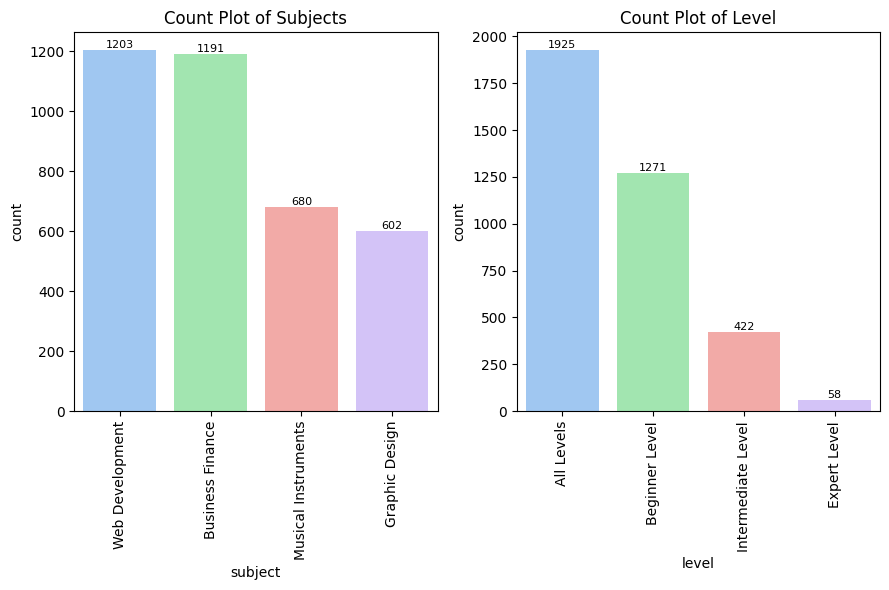

In [ ]:

plt.figure(figsize=(9, 6))

# Count plot for storey_range
plt.subplot(1, 2, 1)
sub_range_order = data['subject'].value_counts().index
count_plot = sns.countplot(x='subject', data=data, order=sub_range_order)
plt.xticks(rotation=90)
plt.title('Count Plot of Subjects')

# Add data labels
for p in count_plot.patches:
    count = int(p.get_height())
    plt.text(p.get_x() + p.get_width() / 2., count + 0.1, count, ha='center', va='bottom', fontsize=8)

# Count plot for town
plt.subplot(1, 2, 2)
level_order = data['level'].value_counts().sort_values(ascending=False).index
count_plot = sns.countplot(x='level', data=data, order=level_order)
plt.xticks(rotation=90)
plt.title('Count Plot of Level')

# Add data labels
for p in count_plot.patches:
    count = int(p.get_height())
    plt.text(p.get_x() + p.get_width() / 2., count + 0.1, count, ha='center', va='bottom', fontsize=8)


plt.tight_layout()
plt.show()


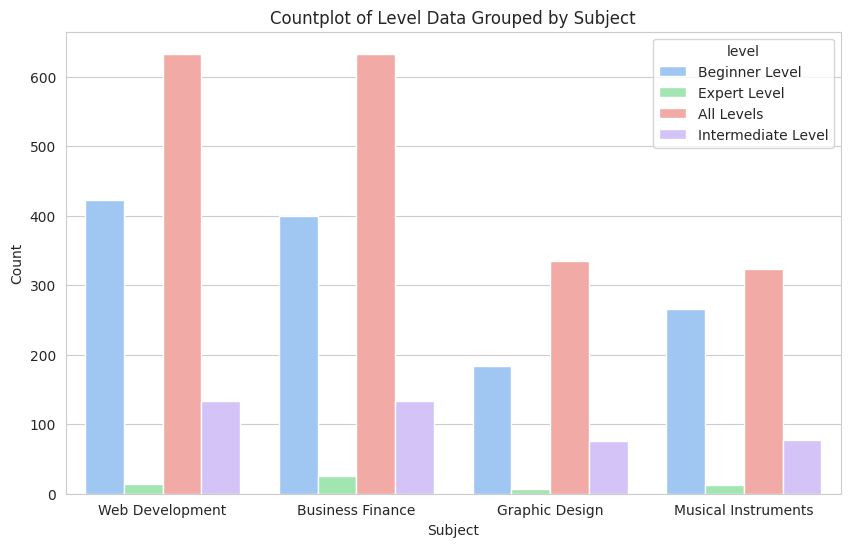

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject', hue ='level', data =data)

plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('Countplot of Level Data Grouped by Subject')


plt.show()

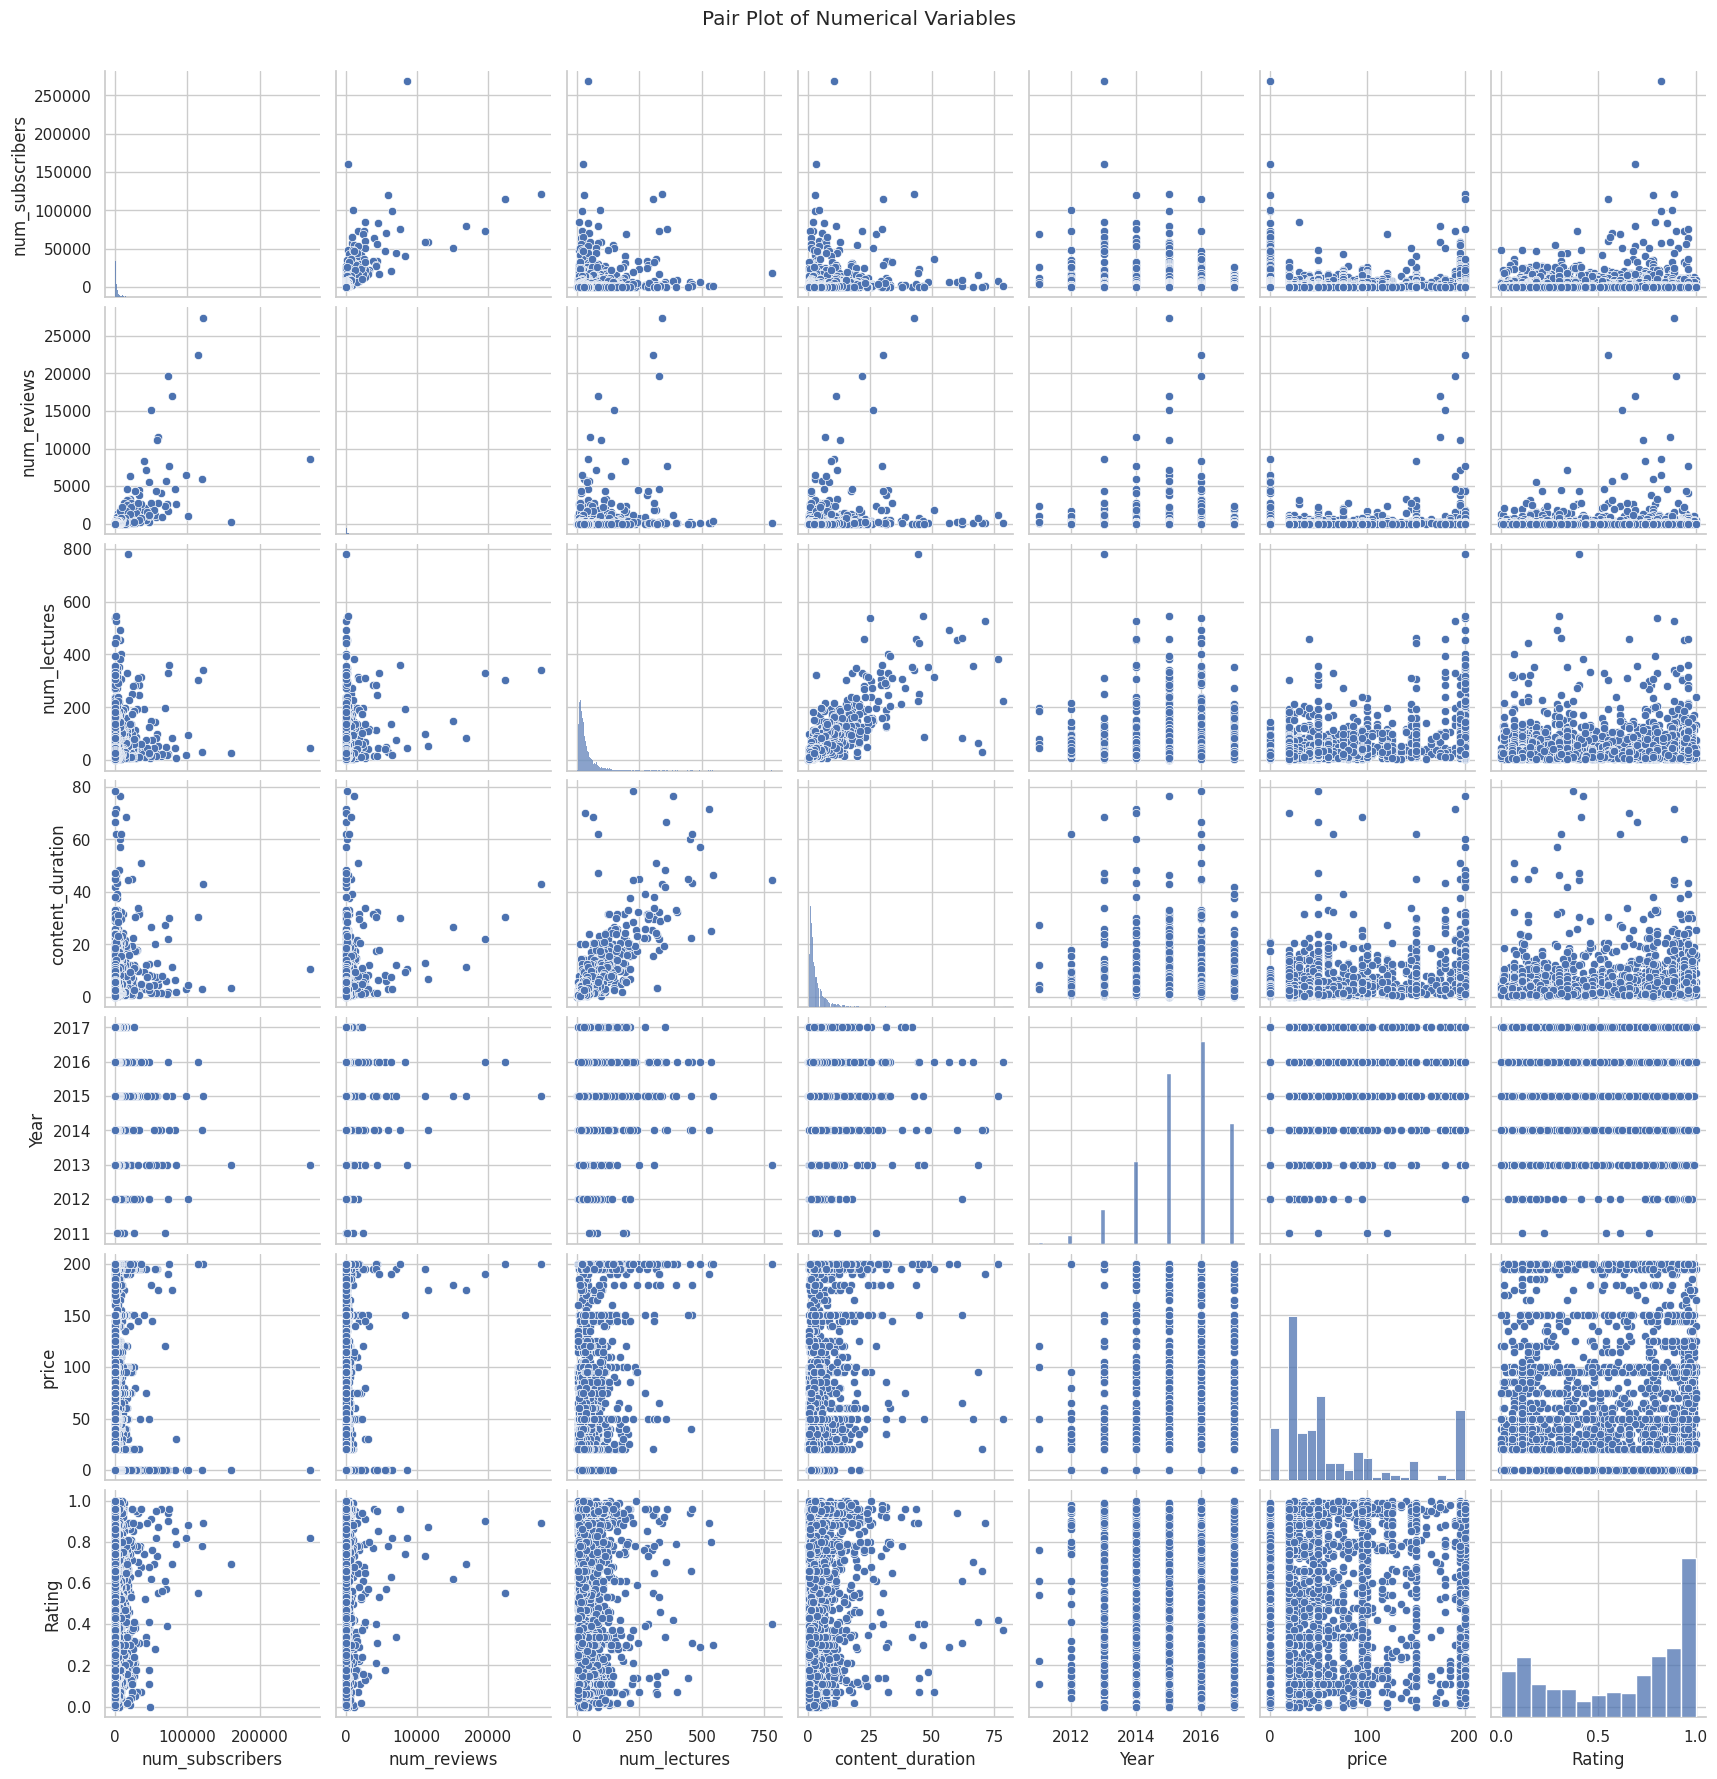

In [ ]:

# Create pair plot for numerical variables
sns.set(style="whitegrid")
numerical_variables = ['num_subscribers','num_reviews','num_lectures','content_duration','Year','price','Rating']
sns.pairplot(data[numerical_variables])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


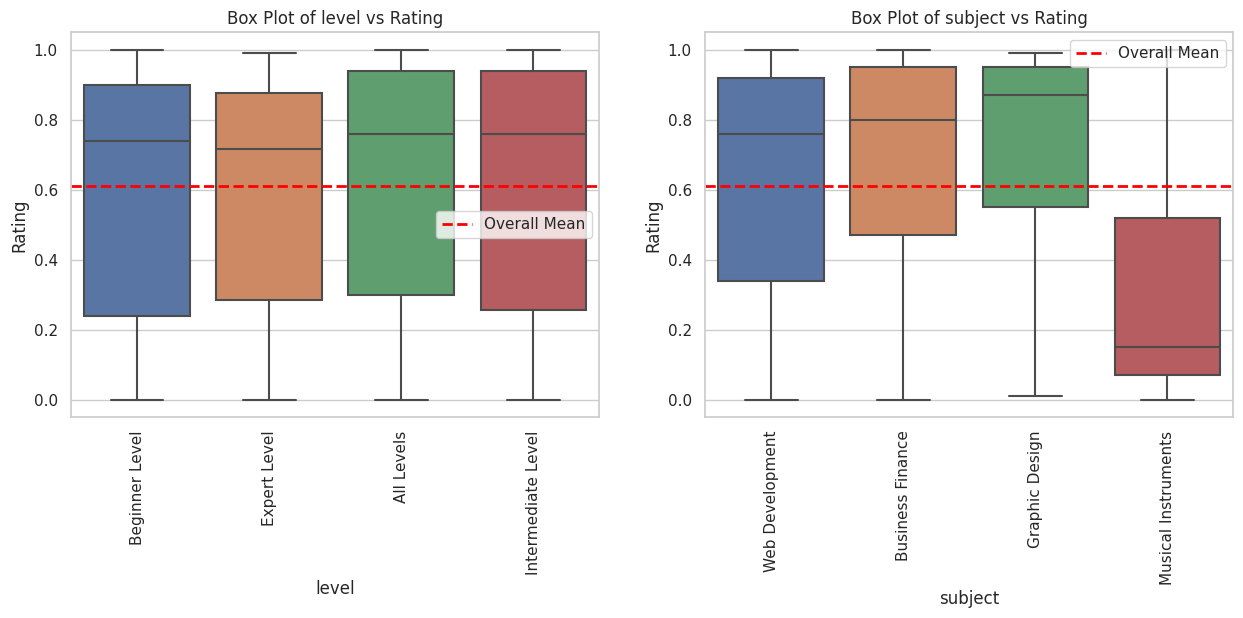

In [ ]:
sns.set(style="whitegrid")
categorical_variables = ['level', 'subject']

plt.figure(figsize=(15, 5))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(1, 2, i)

    # Box plot
    sns.boxplot(x=variable, y='Rating', data=data)

    # Overall mean line
    overall_mean = data['Rating'].mean()
    plt.axhline(overall_mean, color='red', linestyle='dashed', linewidth=2, label='Overall Mean')

    plt.xticks(rotation=90)
    plt.title(f'Box Plot of {variable} vs Rating')
    plt.legend()

plt.show()

Mean across all the level seems indifferent.

Subject:
Musical Instruments subject has lowest rating mean. All the other 3 subjects have their mean rating score than the overall mean.


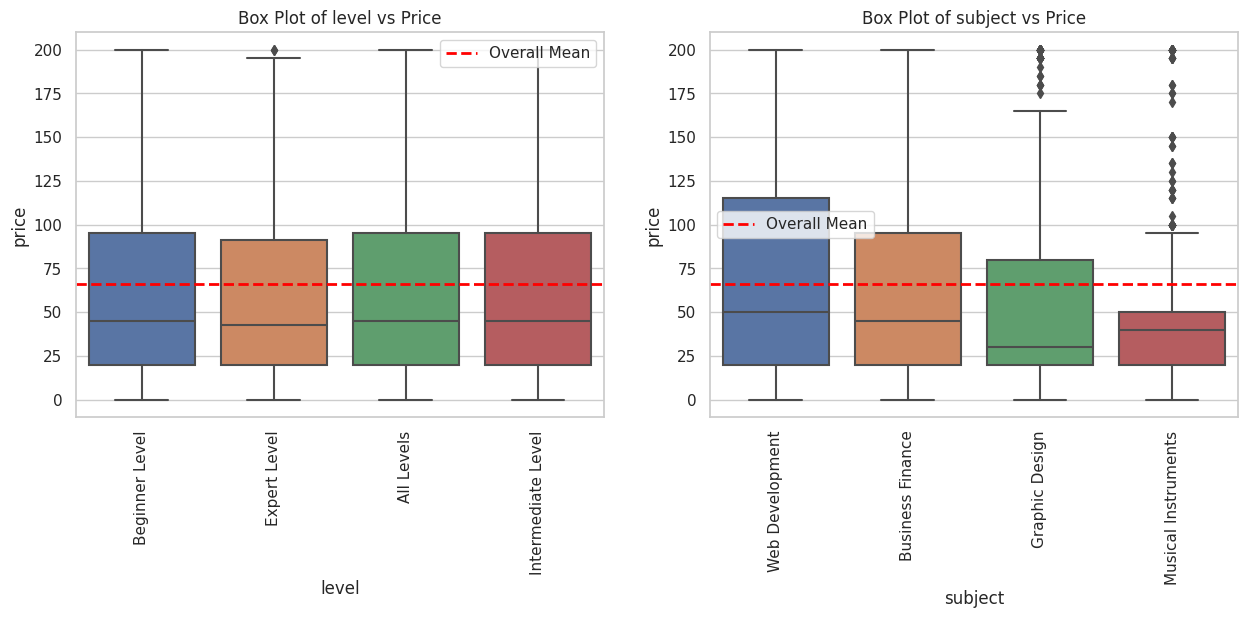

In [ ]:
sns.set(style="whitegrid")
categorical_variables = ['level', 'subject']

plt.figure(figsize=(15, 5))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(1, 2, i)

    # Box plot
    sns.boxplot(x=variable, y='price', data=data)

    # Overall mean line
    overall_mean = data['price'].mean()
    plt.axhline(overall_mean, color='red', linestyle='dashed', linewidth=2, label='Overall Mean')

    plt.xticks(rotation=90)
    plt.title(f'Box Plot of {variable} vs Price')
    plt.legend()

plt.show()

Level category has price which is alsmot equal across.  
Subject: Every subject feature has mean price lower than the overall mean.

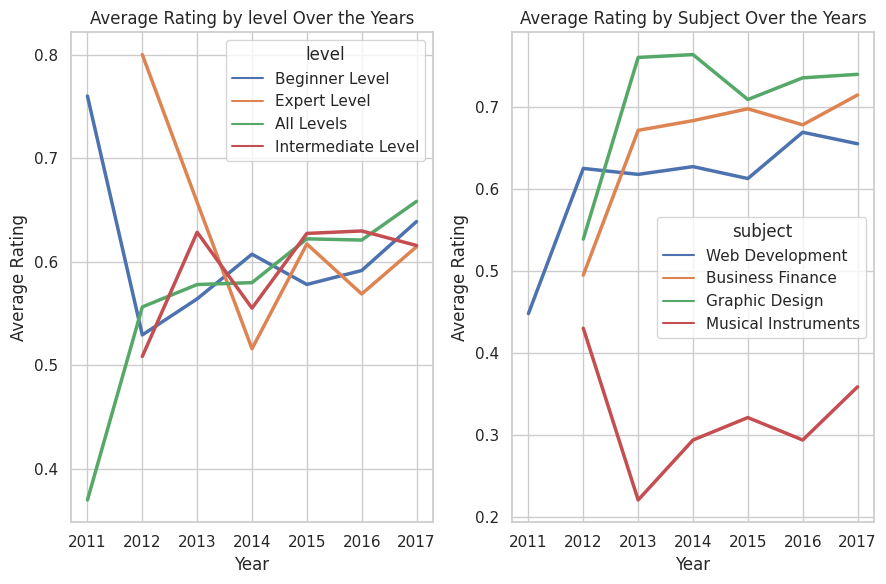

In [ ]:

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)

# Line plot for average resale price by town over the years
sns.lineplot(x='Year', y='Rating', hue='level', data=data, ci=None, linewidth=2.5)
plt.title('Average Rating by level Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')


plt.subplot(1,2,2)
# Line plot for average resale price by town over the years
sns.lineplot(x='Year', y='Rating', hue='subject', data=data, ci=None, linewidth=2.5)
plt.title('Average Rating by Subject Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')


plt.tight_layout()
plt.show()


When we observe the rating by year,

Level:

*   All level  is the feature which has upward trend since its launch, followed by Intermediate level.

*   Beginner and Expert level almost ahs similar pattern, Since its launch it dropped and then picked up a steady pace in increment of Rating

Subject:

*   For Web development, Business Finance, Graohic Design has upward trend in Ratings
*   Musical insutruments since its launch dropped and then picked up a steady upaward pace





**Check distribution adn outliers**

In [ ]:
# Check distribution
def plot(data, column):
  plt.figure(figsize =(20,5))
  plt.subplot(1,3,1)
  sns.boxplot(data = data, x= column)
  plt.title(f'Box Plot for {column}')


  plt.subplot(1, 3, 2)
  sns.distplot(data[column], kde=True, bins=50)
  plt.title(f'Distribution Plot for {column}')
  skewness_value = data[column].skew()
  plt.legend([f'Skewness: {skewness_value:.2f}'])

  plt.subplot(1,3,3)
  sns.violinplot(data = data, x= column)
  plt.title(f'Violin Plot for {column}')
  plt.show()

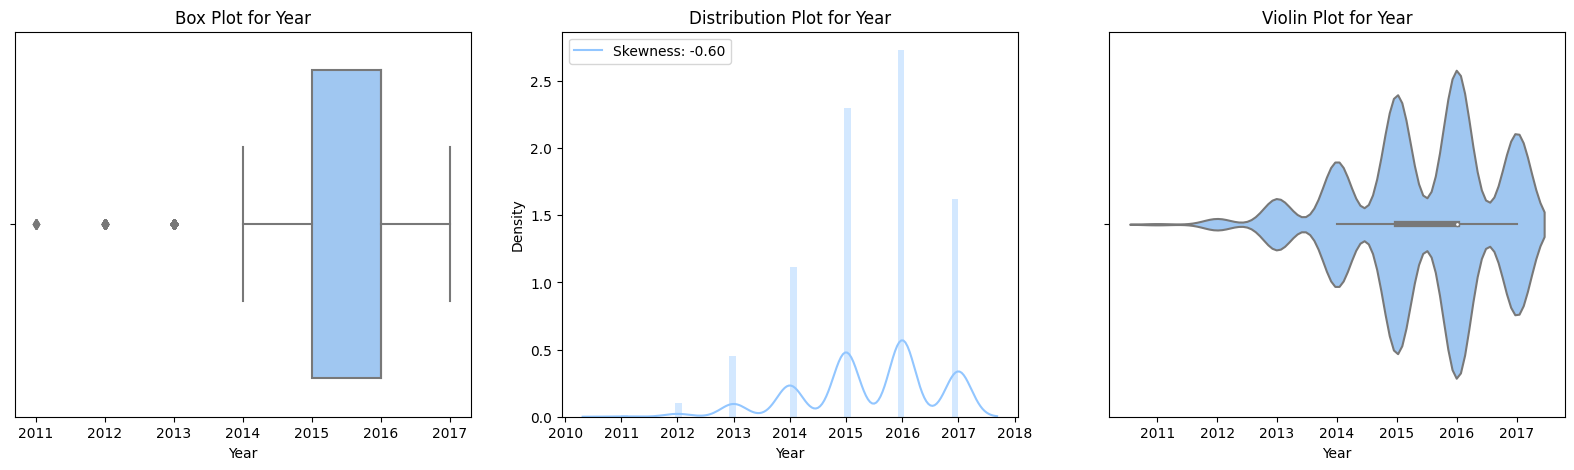

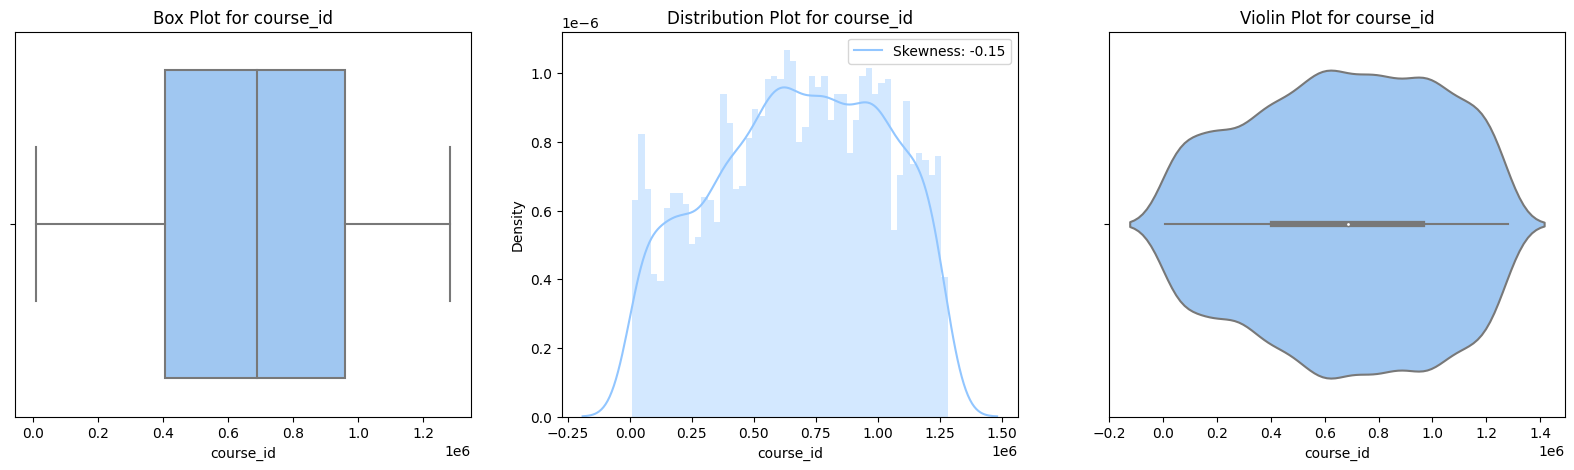

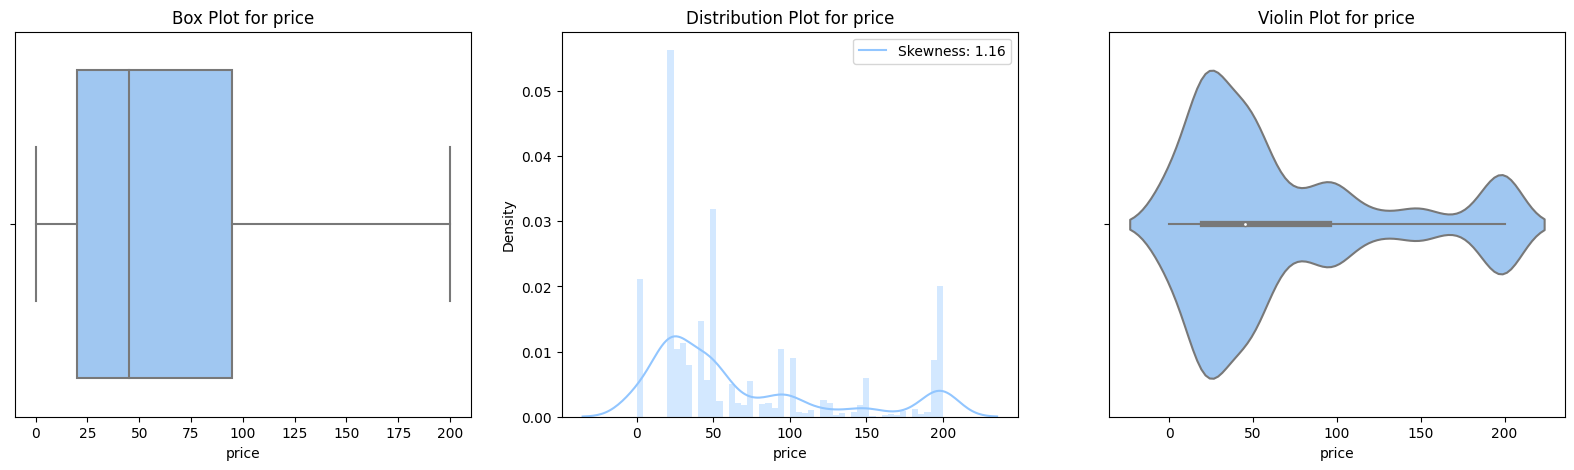

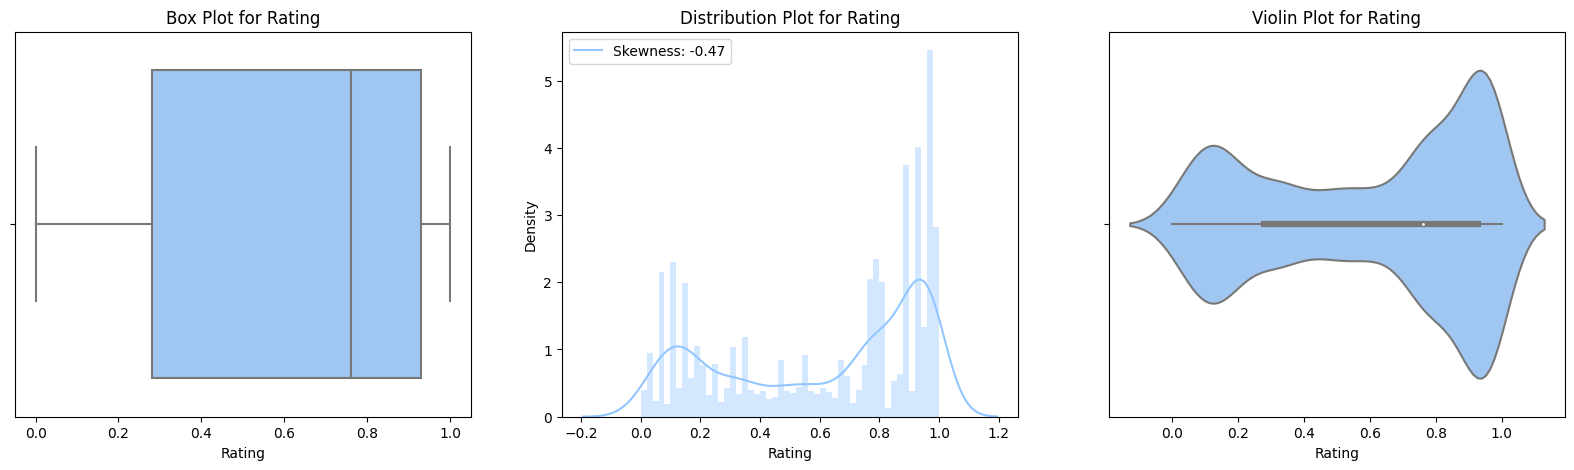

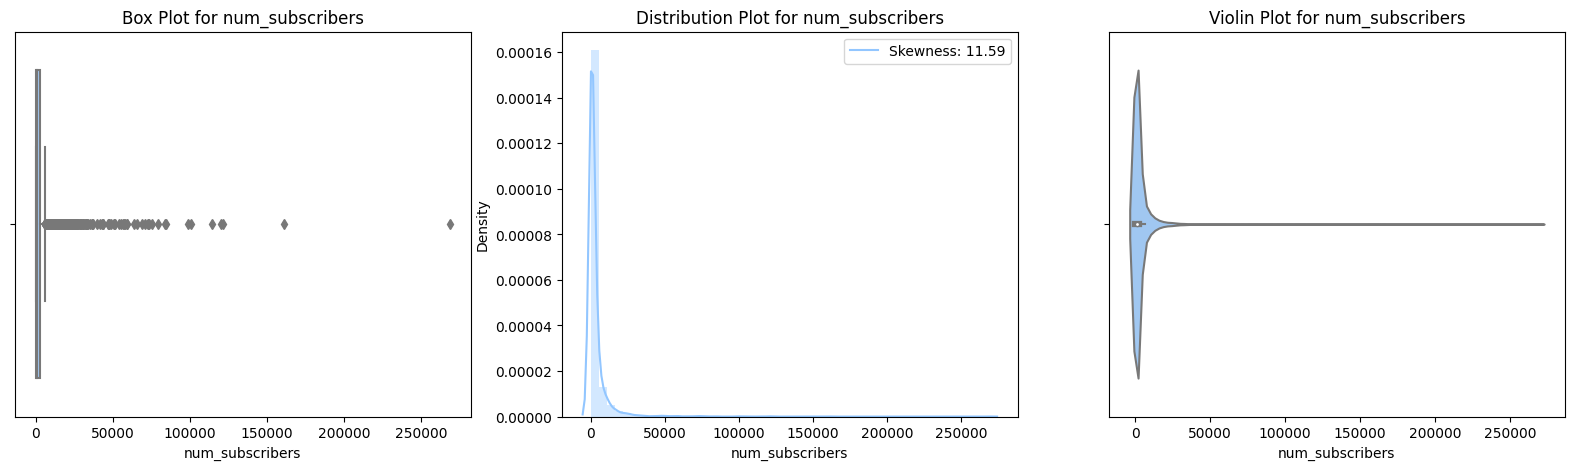

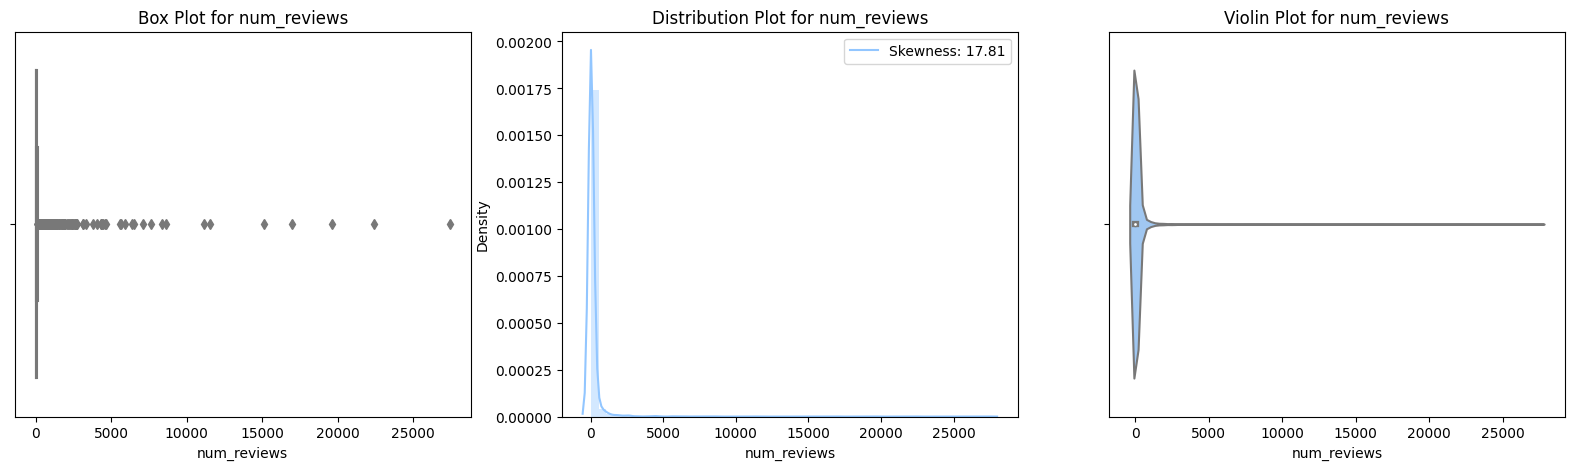

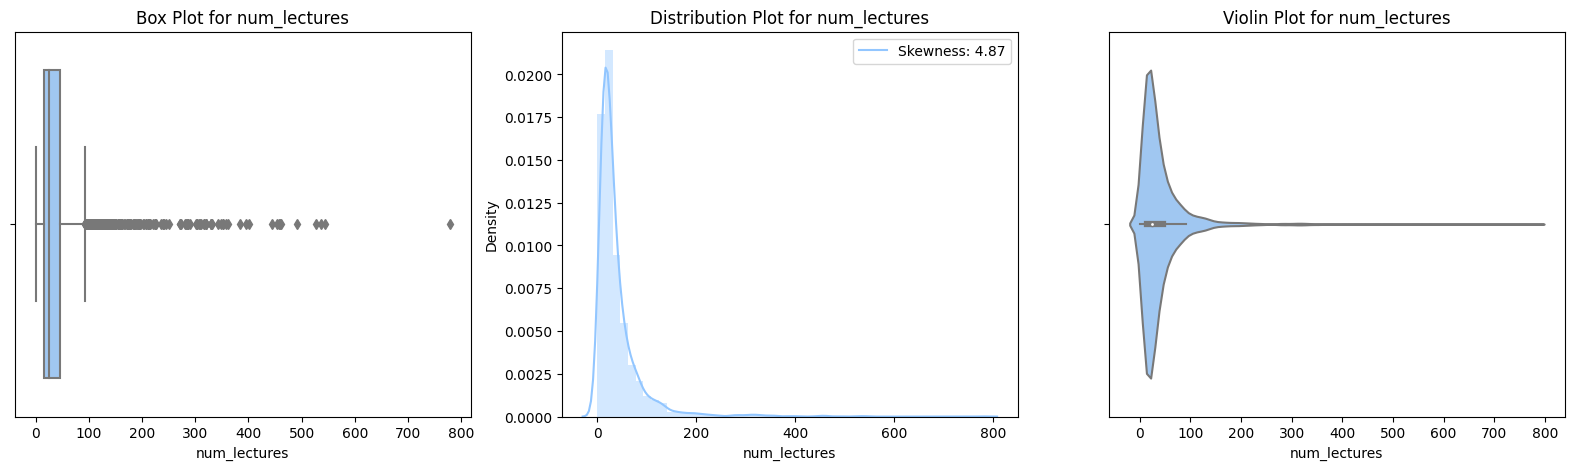

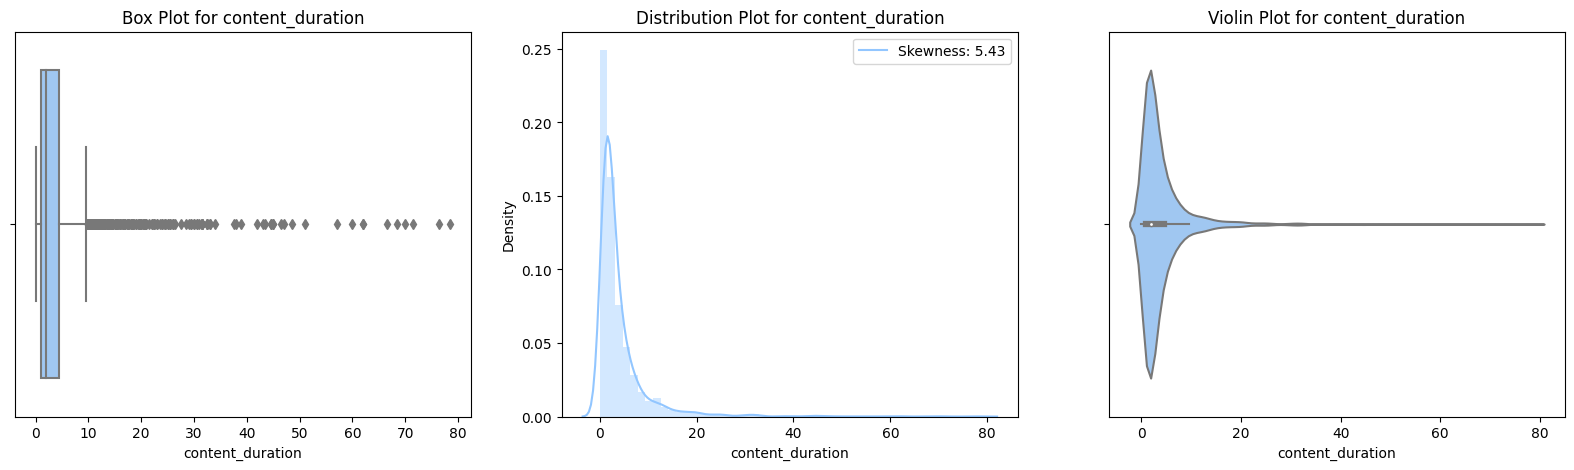

In [ ]:
for i in ['Year','course_id','price','Rating','num_subscribers','num_reviews','num_lectures','content_duration']:
  plot(data,i)


The following features have higher skewness : content_duration,num-lectures,num_reviews,num_subscribers

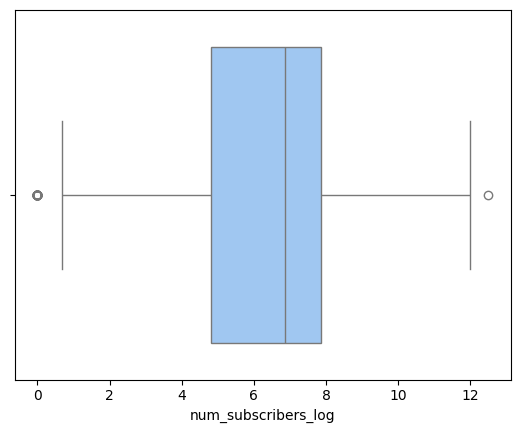

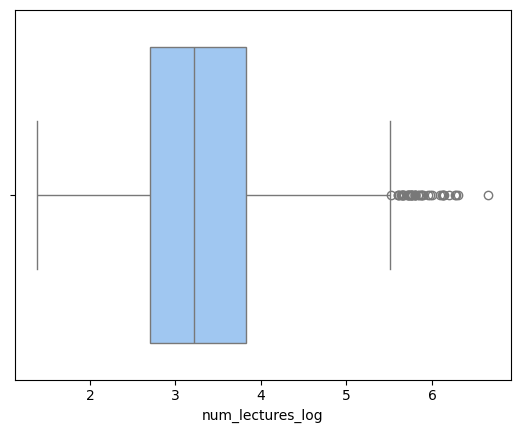

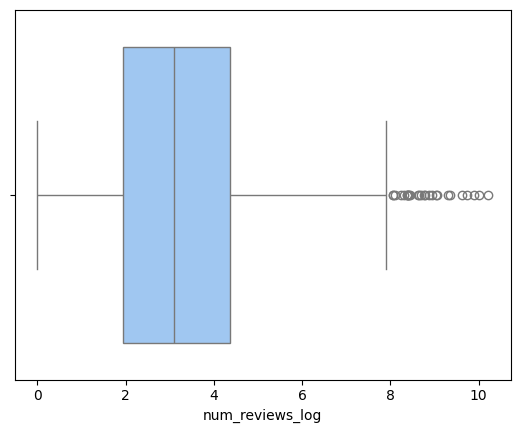

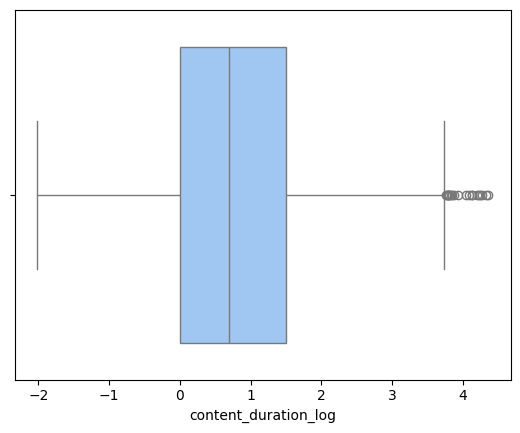

In [ ]:


data['num_subscribers_log'] = np.log(data['num_subscribers'])
sns.boxplot(x='num_subscribers_log', data=data)
plt.show()

data['num_lectures_log'] = np.log(data['num_lectures'])
sns.boxplot(x='num_lectures_log', data=data)
plt.show()

data['num_reviews_log'] = np.log(data['num_reviews'])
sns.boxplot(x='num_reviews_log', data=data)
plt.show()

data['content_duration_log'] = np.log(data['content_duration'])
sns.boxplot(x='content_duration_log', data=data)
plt.show()


In [ ]:
#Check outliers

def outlier(data,column):
  IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
  upper = data[column].quantile(0.75) + (1.5*IQR)
  lower = data[column].quantile(0.75) - (1.5*IQR)
  data[column] = data[column].clip(lower, upper)

outlier(data, 'num_subscribers_log')
outlier(data, 'num_reviews_log')
outlier(data, 'num_lectures_log')
outlier(data, 'content_duration_log')


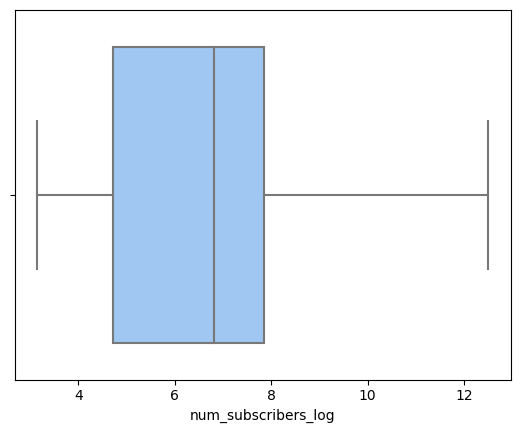

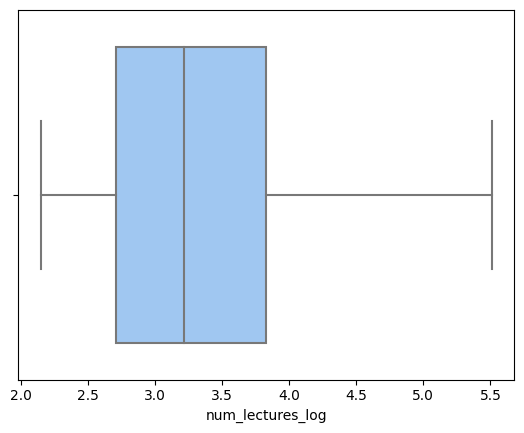

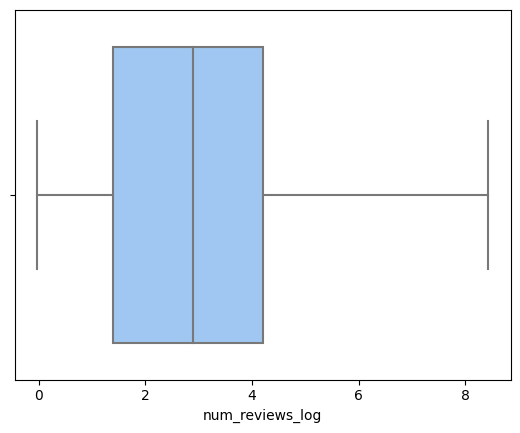

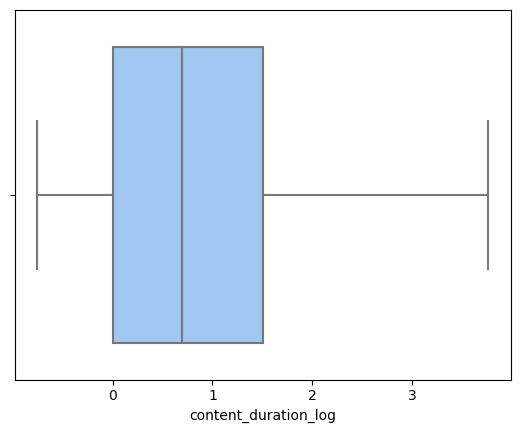

In [ ]:

sns.boxplot(x='num_subscribers_log', data=data)
plt.show()

sns.boxplot(x='num_lectures_log', data=data)
plt.show()

sns.boxplot(x='num_reviews_log', data=data)
plt.show()


sns.boxplot(x='content_duration_log', data=data)
plt.show()


In [ ]:
data

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,Year,num_subscribers_log,num_lectures_log,num_reviews_log,content_duration_log
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,Web Development,2013,12.502180,3.806662,8.432290,2.351375
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,Web Development,2013,11.989340,3.295837,5.631212,1.252763
2,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,Web Development,2015,11.708361,5.509528,8.432290,3.760193
3,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,Web Development,2014,11.697669,3.401197,8.432290,1.098612
4,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,Web Development,2016,11.648435,5.509528,8.432290,3.417727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,Musical Instruments,2017,3.154258,3.135494,-0.022905,0.405465
3676,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,Musical Instruments,2017,3.154258,2.147755,-0.022905,-0.456758
3677,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,Musical Instruments,2017,3.154258,2.147755,-0.022905,-0.628609
3678,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,Musical Instruments,2017,3.154258,2.564949,-0.022905,-0.660357


# **Relationship Significance test for Level, Subject feature with rating**

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

category_columns = ['level', 'subject']
numerical_column = 'Rating'

for category_column in category_columns:
    # Create a list of numerical arrays, each corresponding to a category
    category_groups = [group[numerical_column].values for name, group in data.groupby(category_column)]

    # Perform one-way ANOVA
    f_statistic, p_value = f_oneway(*category_groups)

    # Print results
    print(f"\nANOVA results for {category_column}:")
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)

    # Check if the p-value is significant (e.g., less than 0.05)
    if p_value < 0.05:
        print("Statistically significant - reject the null hypothesis")
    else:
        print("Not statistically significant - Accept the null hypothesis")


ANOVA results for level:
F-statistic: 1.2155122394999487
P-value: 0.30240977644589606
Not statistically significant - Accept the null hypothesis

ANOVA results for subject:
F-statistic: 293.23263948527966
P-value: 1.2104282405695912e-170
Statistically significant - reject the null hypothesis


From ANOVA test, p value for level is higher than 0.05. Hence there is no statistically significant difference in the means of level variables. F- statistic is also lower, which impies the same for level feature.

Subject feature has p value which is lower than 0.05.

In [ ]:
from scipy.stats import f_oneway, kruskal

# Assuming 'guvi' is your DataFrame
category_column = 'level'
numerical_column = 'Rating'

# Separate data into groups based on the 'level' column
grouped_data = [group[numerical_column].values for name, group in data.groupby(category_column)]

# Perform Welch's ANOVA
result_anova = f_oneway(*grouped_data)

# Perform Kruskal-Wallis test
result_kruskal = kruskal(*grouped_data)

# Print results
print(f"Welch's ANOVA results:")
print("F-statistic:", result_anova.statistic)
print("P-value:", result_anova.pvalue)

print("\nKruskal-Wallis results:")
print("H-statistic:", result_kruskal.statistic)
print("P-value:", result_kruskal.pvalue)


Welch's ANOVA results:
F-statistic: 1.2155122394999487
P-value: 0.30240977644589606

Kruskal-Wallis results:
H-statistic: 5.429015923285197
P-value: 0.1429464358774374


**Dropping the unwanted columns**

In [ ]:
final = data.drop(['num_subscribers','num_reviews','num_lectures','content_duration'], axis =1)

In [ ]:
final

,price,level,Rating,subject,Year,num_subscribers_log,num_lectures_log,num_reviews_log,content_duration_log
0,0.0,Beginner Level,0.82,Web Development,2013,12.502180,3.806662,8.432290,2.351375
1,0.0,Expert Level,0.69,Web Development,2013,11.989340,3.295837,5.631212,1.252763
2,200.0,Beginner Level,0.89,Web Development,2015,11.708361,5.509528,8.432290,3.760193
3,0.0,All Levels,0.78,Web Development,2014,11.697669,3.401197,8.432290,1.098612
4,200.0,Beginner Level,0.55,Web Development,2016,11.648435,5.509528,8.432290,3.417727
...,...,...,...,...,...,...,...,...,...
3675,20.0,All Levels,0.31,Musical Instruments,2017,3.154258,3.135494,-0.022905,0.405465
3676,125.0,Beginner Level,0.06,Musical Instruments,2017,3.154258,2.147755,-0.022905,-0.456758
3677,20.0,All Levels,0.08,Musical Instruments,2017,3.154258,2.147755,-0.022905,-0.628609
3678,35.0,Beginner Level,0.78,Musical Instruments,2017,3.154258,2.564949,-0.022905,-0.660357


<Axes: title={'center': 'Correlation Heatmap'}>

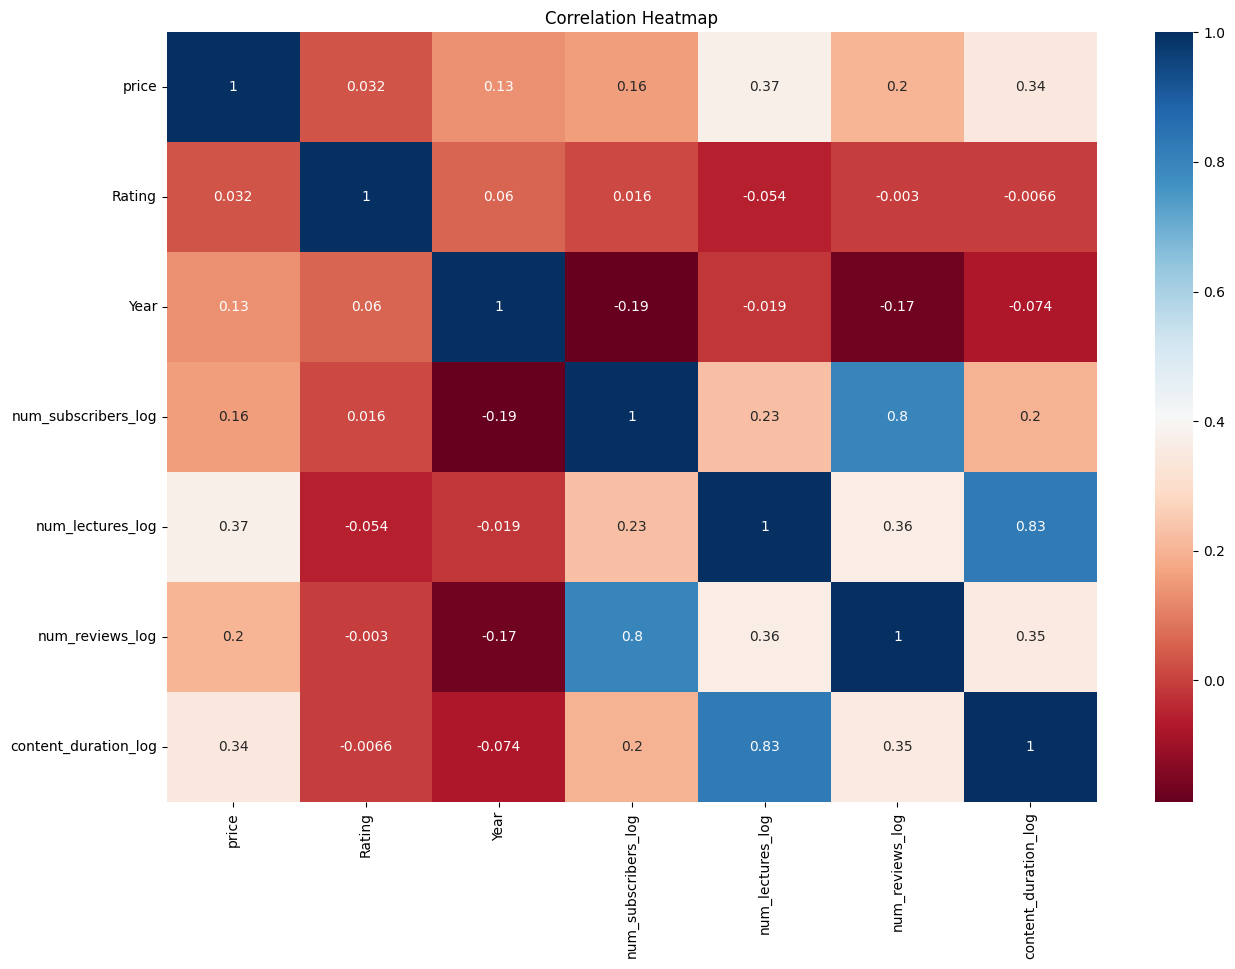

In [ ]:


corrMatrix = final.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix,
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu',
    annot=True
)

**Dropping the columns with multicollinearity**

In [ ]:

guvi = final.drop(['content_duration_log','num_reviews_log'],axis =1)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical variables using Label Encoding
lc = LabelEncoder()

guvi['level'] = lc.fit_transform(guvi['level'])
guvi['subject'] = lc.fit_transform(guvi['subject'])


In [ ]:
guvi1 = guvi.drop(['level'],axis =1)
guvi1

,price,Rating,subject,Year,num_subscribers_log,num_lectures_log
0,0.0,0.82,3,2013,12.502180,3.806662
1,0.0,0.69,3,2013,11.989340,3.295837
2,200.0,0.89,3,2015,11.708361,5.509528
3,0.0,0.78,3,2014,11.697669,3.401197
4,200.0,0.55,3,2016,11.648435,5.509528
...,...,...,...,...,...,...
3675,20.0,0.31,2,2017,3.154258,3.135494
3676,125.0,0.06,2,2017,3.154258,2.147755
3677,20.0,0.08,2,2017,3.154258,2.147755
3678,35.0,0.78,2,2017,3.154258,2.564949


<Axes: title={'center': 'Correlation Heatmap'}>

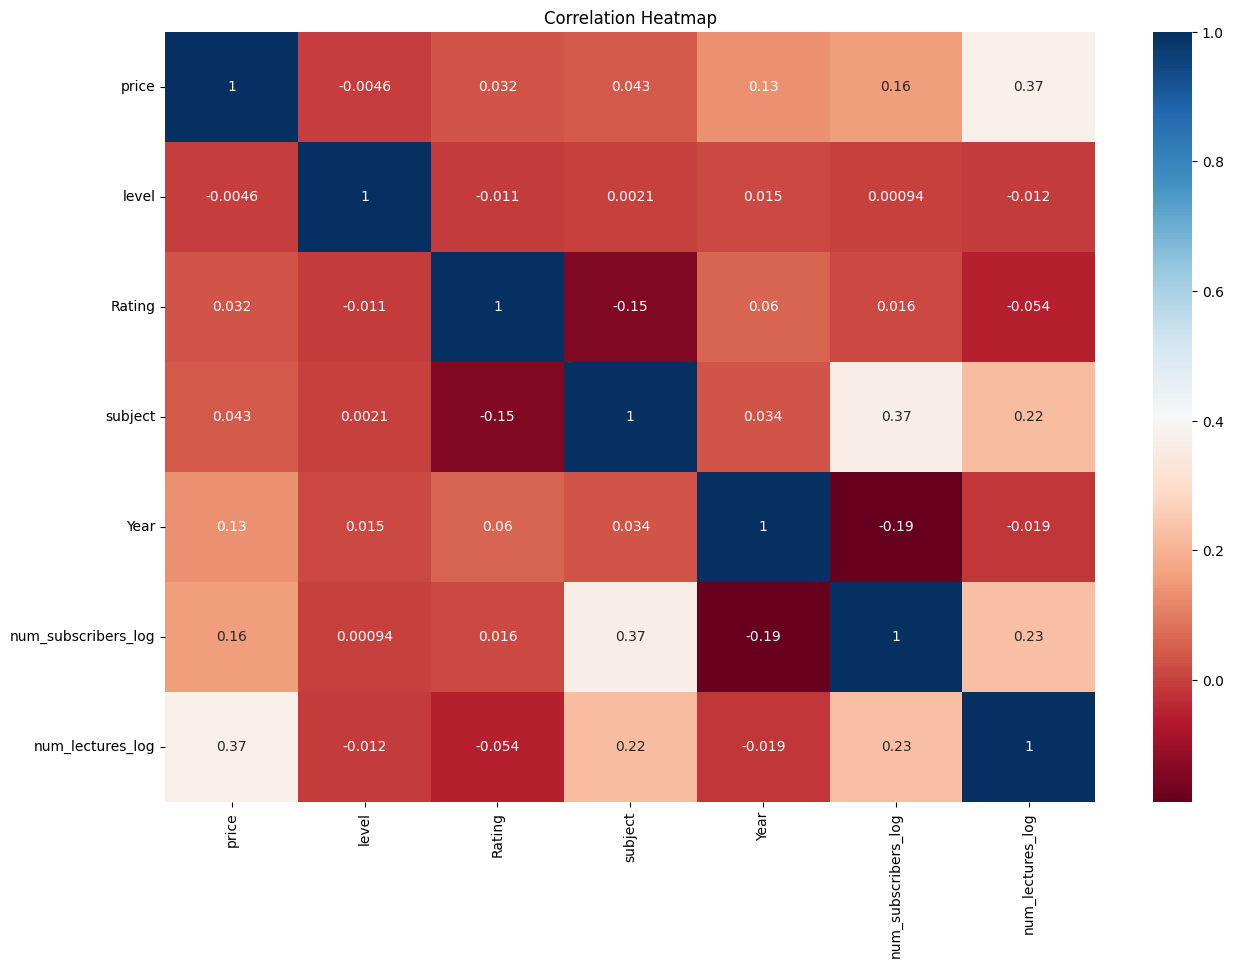

In [ ]:


corrMatrix = guvi.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix,
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu',
    annot=True
)

In [ ]:
guvi.dropna(inplace = True)

# **MODEL ASSESSMENTS**

# **1. DECISIONTREE REGRESSOR**

In [ ]:

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'R2_train', 'R2_test','MSE'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings


# To ignore specific warnings
warnings.filterwarnings("ignore")

X = guvi.drop(['Rating'],axis =1)
y = guvi['Rating']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {'max_depth': [2, 5, 10,20,25],
              'min_samples_split': [ 2, 5, 10,20],
              'min_samples_leaf': [ 1, 2, 4,10],
              'max_features': ['auto', 'sqrt', 'log2']}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, best_model.predict(X_train))
print('R-squared for train data:',train_r2)
print('R-squared for test data:',test_r2)
print('Mean squared error:', mse)


Best hyperparameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 10}
R-squared for train data: 0.34997472954507636
R-squared for test data: 0.2591317169441555
Mean squared error: 0.0813390781320149


In [ ]:
# Append the results to the DataFrame
results = results.append({'Model': 'DecisionTree Regressor',
        'R2_train': train_r2,
        'R2_test': test_r2,
        'MSE': mse,
    }, ignore_index=True)


In [ ]:

results

,Model,R2_train,R2_test,MSE
0,DecisionTree Regressor,0.349975,0.259132,0.081339


# **2.1 XGB REGRESSOR**

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV, KFold
import warnings
import scipy
from scipy.stats import uniform

# To ignore specific warnings
warnings.filterwarnings("ignore")

X = guvi.drop(['Rating'],axis =1)
y = guvi['Rating']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
xgbr = xgb.XGBRegressor()

# hyperparameters
param_grid = {
    'n_estimators': [100,200,300,400, 500,1000],
    'learning_rate': np.linspace(0.01, 0.001, 500),
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9],
}

# gridsearchcv
rsc = RandomizedSearchCV(estimator=xgbr, param_distributions=param_grid, cv=5)
rsc.fit(X_train, y_train)
print("Best hyperparameters:", rsc.best_params_)
xgb_bestmodel = rsc.best_estimator_
y_pred = xgb_bestmodel.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, best_model.predict(X_train))
print('R-squared for train data:',train_r2)
print('R-squared for test data:',test_r2)
print('Mean squared error:', mse)



Best hyperparameters: {'subsample': 0.9, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.005328657314629259}
R-squared for train data: 0.34997472954507636
R-squared for test data: 0.30055946019493074
Mean squared error: 0.07679077376783164


In [ ]:

results = results.append({'Model': 'XGBOOST Regressor',
        'R2_train': train_r2,
        'R2_test': test_r2,
        'MSE': mse,
    }, ignore_index=True)
results

,Model,R2_train,R2_test,MSE
0,DecisionTree Regressor,0.349975,0.259132,0.081339
1,XGBOOST Regressor,0.349975,0.300559,0.076791


# **2.1.2 XGB REGRESSOR W/O LEVEL FEATURE**

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV, KFold
import warnings
import scipy
from scipy.stats import uniform

# To ignore specific warnings
warnings.filterwarnings("ignore")

X = guvi1.drop(['Rating'],axis =1)
y = guvi1['Rating']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
xgbr = xgb.XGBRegressor()

# hyperparameters
param_grid = {
    'n_estimators': [100,200,300,400, 500,1000],
    'learning_rate': np.linspace(0.01, 0.001, 500),
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9],
}

# gridsearchcv
rsc = RandomizedSearchCV(estimator=xgbr, param_distributions=param_grid, cv=5)
rsc.fit(X_train, y_train)
print("Best hyperparameters:", rsc.best_params_)
xgb_bestmodel = rsc.best_estimator_
y_pred = xgb_bestmodel.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, xgb_bestmodel.predict(X_train))
print('R-squared for train data:',train_r2)
print('R-squared for test data:',test_r2)
print('Mean squared error:', mse)



Best hyperparameters: {'subsample': 0.9, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.00669939879759519}
R-squared for train data: 0.6247747131565883
R-squared for test data: 0.3190839340395615
Mean squared error: 0.07475699305422359


In [ ]:

results = results.append({'Model': 'XGBOOST Regressor w/o Level feature',
        'R2_train': train_r2,
        'R2_test': test_r2,
        'MSE': mse,
    }, ignore_index=True)
results

,Model,R2_train,R2_test,MSE
0,DecisionTree Regressor,0.349975,0.259132,0.081339
1,XGBOOST Regressor,0.349975,0.300559,0.076791
2,XGBOOST Regressor w/o Level feature,0.624775,0.319084,0.074757


# **2.2 XGBOOST RANDOMFOREST REGRESSOR**

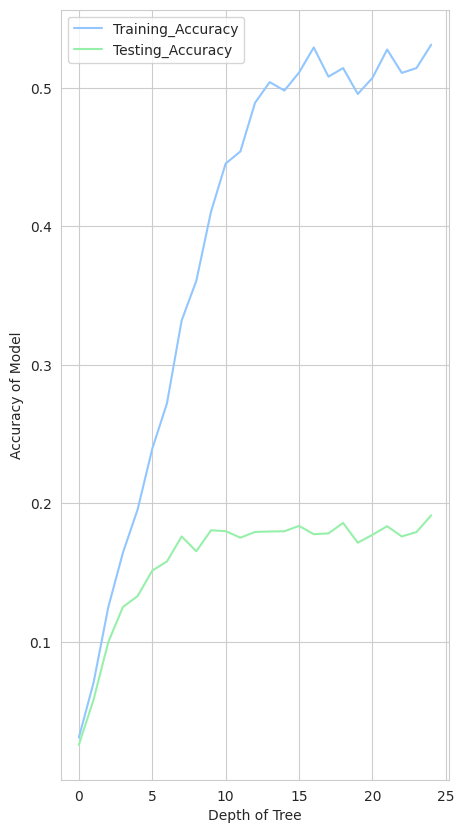

In [ ]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

train_accuracy=[]
test_accuracy=[]



X = guvi.drop(['Rating'],axis =1)
y = guvi['Rating']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for i in range(1,26):
    # Train the model
    model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2,max_depth=i)
    model.fit(X_train, y_train)

    train_accuracy.append(model.score(X_train,y_train))
    test_accuracy.append(model.score(X_test,y_test))

# plotting graph for finding optimal max_depth
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
plt.plot(train_accuracy,label='Training_Accuracy')
plt.plot(test_accuracy,label='Testing_Accuracy')
plt.xticks(range(0,26,5))
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy of Model')
plt.legend(loc='upper left')
plt.show()

In [ ]:

# Train the model
model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2,max_depth=25)
model.fit(X_train, y_train)

# fit the regressor with X and Y data
model.fit(X_train, y_train)
print("The r2 score of Training data",model.score(X_train,y_train))
# Testing Test
r2 = model.score(X_test,y_test)
print('The r2 score of Testing data', r2)
y_pred=model.predict(X_test)
print('The RMSE score of model is ',MSE(y_test,y_pred,squared=False))

The r2 score of Training data 0.5311114629622846
The r2 score of Testing data 0.19127397903753962
The RMSE score of model is  0.2979750010698094


In [ ]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import  RandomizedSearchCV, KFold
import warnings
import scipy
from scipy.stats import uniform

# To ignore specific warnings
warnings.filterwarnings("ignore")


X = guvi.drop(['Rating'],axis =1)
y = guvi['Rating']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
xgbrf = XGBRFRegressor()

# hyperparameters
param_grid = {'n_estimators':[200,300,400,500,1000],
              'max_depth': [15,16,17,18,19,20,21,22,23,24,25],
              'min_samples_split': [ 2, 5, 10,20],
              'min_samples_leaf': [ 1, 2, 4,10],
              'max_features': ['auto', 'sqrt', 'log2']
              }

# gridsearchcv
rsc = RandomizedSearchCV(estimator=xgbrf, param_distributions =param_grid, cv=5)
rsc.fit(X_train, y_train)
print("Best hyperparameters:", rsc.best_params_)
xgbrf_bestmodel = rsc.best_estimator_
y_pred = xgbrf_bestmodel.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, xgbrf_bestmodel.predict(X_train))
print('Mean squared error:', mse)
print('R-squared for train data:',train_r2)
print('R-squared for test data:',test_r2)


Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 15}
Mean squared error: 0.07861542292760021
R-squared for train data: 0.926825203377186
R-squared for test data: 0.28393983871381445


In [ ]:

results = results.append({'Model': 'XGBOOST RF Regressor',
        'R2_train': train_r2,
        'R2_test': test_r2,
        'MSE': mse,
    }, ignore_index=True)
results

,Model,R2_train,R2_test,MSE
0,DecisionTree Regressor,0.349975,0.259132,0.081339
1,XGBOOST Regressor,0.349975,0.300559,0.076791
2,XGBOOST Regressor w/o Level feature,0.624775,0.319084,0.074757
3,XGBOOST RF Regressor,0.926825,0.283940,0.078615


# **XG BOOST FR REGRESSOR WITHOUT LEVEL FEATURE**

In [ ]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import  RandomizedSearchCV, KFold
import warnings
import scipy
from scipy.stats import uniform

# To ignore specific warnings
warnings.filterwarnings("ignore")


X = guvi1.drop(['Rating'],axis =1)
y = guvi1['Rating']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
xgbrf = XGBRFRegressor()

# hyperparameters
param_grid = {'n_estimators':[200,300,400,500,1000],
              'max_depth': [15,16,17,18,19,20,21,22,23,24,25],
              'min_samples_split': [ 2, 5, 10,20],
              'min_samples_leaf': [ 1, 2, 4,10],
              'max_features': ['auto', 'sqrt', 'log2']
              }

# gridsearchcv
rsc = RandomizedSearchCV(estimator=xgbrf, param_distributions =param_grid, cv=5)
rsc.fit(X_train, y_train)
print("Best hyperparameters:", rsc.best_params_)
best_model = rsc.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, best_model.predict(X_train))
print('Mean squared error:', mse)
print('R-squared for train data:',train_r2)
print('R-squared for test data:',test_r2)


Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 16}
Mean squared error: 0.08011951320511942
R-squared for train data: 0.9396554622656937
R-squared for test data: 0.27023999348495575


In [ ]:

results = results.append({'Model': 'XGBOOST RF Regressor W/O Level',
        'R2_train': train_r2,
        'R2_test': test_r2,
        'MSE': mse,
    }, ignore_index=True)
results

,Model,R2_train,R2_test,MSE
0,DecisionTree Regressor,0.349975,0.259132,0.081339
1,XGBOOST Regressor,0.349975,0.300559,0.076791
2,XGBOOST Regressor w/o Level feature,0.624775,0.319084,0.074757
3,XGBOOST RF Regressor,0.926825,0.283940,0.078615
4,XGBOOST RF Regressor W/O Level,0.939655,0.270240,0.080120


# **3.1 RANDOMFOREST REGRESSOR**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV, KFold
import warnings
import scipy
from scipy.stats import uniform

# To ignore specific warnings
warnings.filterwarnings("ignore")


X = guvi.drop(['Rating'],axis =1)
y = guvi['Rating']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
rf = RandomForestRegressor()

# hyperparameters
param_grid = {'n_estimators':[200,300,400,500,1000],
              'max_depth': [2, 5,7,8,9 ,10,11,12,13,14,15,20,25],
              'min_samples_split': [ 2, 5, 10,20],
              'min_samples_leaf': [ 1, 2, 4,10],
              'max_features': ['auto', 'sqrt', 'log2']
              }

# gridsearchcv
rsc = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=5)
rsc.fit(X_train, y_train)
print("Best hyperparameters:", rsc.best_params_)
best_model = rsc.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, best_model.predict(X_train))
print('Mean squared error:', mse)
print('R-squared for train data:',train_r2)
print('R-squared for test data:',test_r2)


Best hyperparameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 12}
Mean squared error: 0.07238423954070712
R-squared for train data: 0.6890110965001277
R-squared for test data: 0.3406959053336124


In [ ]:
rsc.score

<bound method BaseSearchCV.score of RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [2, 5, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [200, 300, 400, 500,
                                                         1000]})>

In [ ]:
rsc.best_score_

0.3485458801120525

In [ ]:
print("The r2 score of Training data",rsc.score(X_train,y_train))
# Testing Test
print('The r2 score of Testing data', rsc.score(X_test,y_test))

y_pred=rsc.predict(X_test)
print('The RMSE score of model is ', mse)

The r2 score of Training data 0.578500114300678
The r2 score of Testing data 0.3351168030433975
The RMSE score of model is  0.07299676277522664


In [ ]:

results = results.append({'Model': 'RANDOM FOREST Regressor',
        'R2_train': train_r2,
        'R2_test': test_r2,
        'MSE': mse,
    }, ignore_index=True)
results

,Model,R2_train,R2_test,MSE
0,DecisionTree Regressor,0.349975,0.259132,0.081339
1,XGBOOST Regressor,0.349975,0.300559,0.076791
2,XGBOOST Regressor w/o Level feature,0.624775,0.319084,0.074757
3,XGBOOST RF Regressor,0.926825,0.283940,0.078615
4,XGBOOST RF Regressor W/O Level,0.939655,0.270240,0.080120
5,RANDOM FOREST Regressor,0.689011,0.340696,0.072384


**Lets try by dropping the level feature**

# **3.1.1 RANDOMFOREST REGRESSOR W/O LEVEL**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV, KFold
import warnings
import scipy
from scipy.stats import uniform

# To ignore specific warnings
warnings.filterwarnings("ignore")


X = guvi1.drop(['Rating'],axis =1)
y = guvi1['Rating']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
rf = RandomForestRegressor()

# hyperparameters
param_grid = {'n_estimators':[200,300,400,500,1000],
              'max_depth': [2, 5,7,8,9 ,10,11,12,13,14,15,20,25],
              'min_samples_split': [ 2, 5, 10,20],
              'min_samples_leaf': [ 1, 2, 4,10],
              'max_features': ['auto', 'sqrt', 'log2']
              }

# gridsearchcv
rsc = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=5)
rsc.fit(X_train, y_train)
print("Best hyperparameters:", rsc.best_params_)
best_model = rsc.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, best_model.predict(X_train))
print('Mean squared error:', mse)
print('R-squared for train data:',train_r2)
print('R-squared for test data:',test_r2)


Best hyperparameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 12}
Mean squared error: 0.08063674549276673
R-squared for train data: 0.6100550328226606
R-squared for test data: 0.2655288385801957


In [ ]:

results = results.append({'Model': 'RF Regressor W/O Level feature)',
        'R2_train': train_r2,
        'R2_test': test_r2,
        'MSE': mse,
    }, ignore_index=True)
results

,Model,R2_train,R2_test,MSE
0,DecisionTree Regressor,0.349975,0.259132,0.081339
1,XGBOOST Regressor,0.349975,0.300559,0.076791
2,XGBOOST Regressor w/o Level feature,0.624775,0.319084,0.074757
3,XGBOOST RF Regressor,0.926825,0.283940,0.078615
4,XGBOOST RF Regressor W/O Level,0.939655,0.270240,0.080120
5,RANDOM FOREST Regressor,0.689011,0.340696,0.072384
6,RF Regressor W/O Level feature),0.610055,0.265529,0.080637


**checking the optimal depth of Random Forest tree**

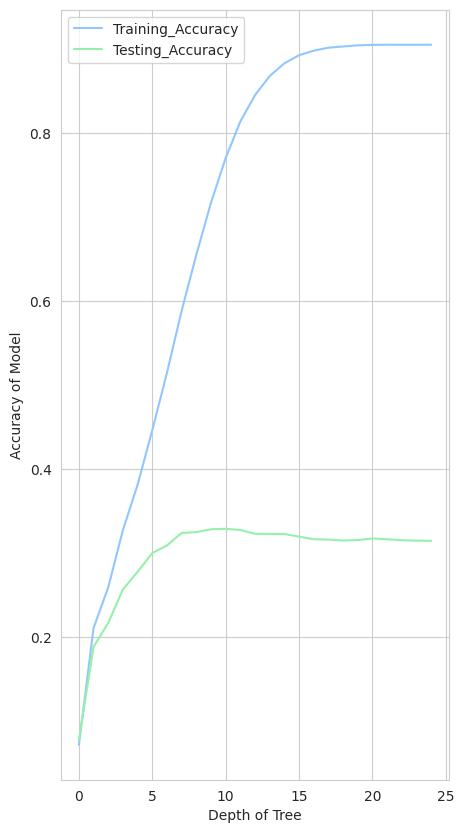

In [ ]:
train_accuracy=[]
test_accuracy=[]


X = guvi.drop(['Rating'],axis =1)
y = guvi['Rating']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
for i in range(1,26):
    # Train the model
    model = RandomForestRegressor(n_estimators=100,max_depth=i, random_state=1)
    model.fit(X_train, y_train)

    # fit the regressor with X and Y data
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train,y_train))
    #print("The r2 score of Training dataset for linear model is",model.score(x_train,y_train))
    # Testing Test
    test_accuracy.append(model.score(X_test,y_test))
    #print('The r2 score of Testing Dataset for a linear model is', r2)

# plotting graph for finding optimal max_depth
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
plt.plot(train_accuracy,label='Training_Accuracy')
plt.plot(test_accuracy,label='Testing_Accuracy')
plt.xticks(range(0,26,5))
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy of Model')
plt.legend(loc='upper left')
plt.show()

Lets manually test the optimum features

# **3.2.1 RANDOMFOREST REGRESSOR** -MANUAL WITH LEVEL FEATURE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

X = guvi.drop(['Rating'],axis =1)
y = guvi['Rating']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators = 1000,max_depth =  11,random_state =42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = MSE(y_test, y_pred)
test_r2 = model.score(X_test,y_test)
train_r2 = model.score(X_train,y_train)

print("The r2 score for training data:",train_r2 )
print("the r2score for test data:", test_r2)


print("MSE:", mse)


The r2 score for training data: 0.7702138291504136
the r2score for test data: 0.33135195266197515
MSE: 0.0734101013758032


In [ ]:

results = results.append({'Model': 'RF Regressor manual optimal features',
        'R2_train': train_r2,
        'R2_test': test_r2,
        'MSE': mse,
    }, ignore_index=True)
results

,Model,R2_train,R2_test,MSE
0,DecisionTree Regressor,0.349975,0.259132,0.081339
1,XGBOOST Regressor,0.349975,0.300559,0.076791
2,XGBOOST Regressor w/o Level feature,0.624775,0.319084,0.074757
3,XGBOOST RF Regressor,0.926825,0.283940,0.078615
4,XGBOOST RF Regressor W/O Level,0.939655,0.270240,0.080120
5,RANDOM FOREST Regressor,0.689011,0.340696,0.072384
6,RF Regressor W/O Level feature),0.610055,0.265529,0.080637
7,RF Regressor manual optimal features,0.770214,0.331352,0.073410


Lets manually test the optimum features

# **3.2.2 RANDOMFOREST REGRESSOR** -MANUAL WITHOUT LEVEL FEATURE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

X = guvi1.drop(['Rating'],axis =1)
y = guvi1['Rating']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators = 1000,max_depth =  11,random_state =42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = MSE(y_test, y_pred)
test_r2 = model.score(X_test,y_test)
train_r2 = model.score(X_train,y_train)

print("The r2 score for training data:",train_r2 )
print("the r2score for test data:", test_r2)


print("MSE:", mse)


The r2 score for training data: 0.7671940977344106
the r2score for test data: 0.33086460665220996
MSE: 0.07346360653464482


In [ ]:

results = results.append({'Model': 'RF Regressor Manual W/O LEVEL',
        'R2_train': train_r2,
        'R2_test': test_r2,
        'MSE': mse,
    }, ignore_index=True)
results

,Model,R2_train,R2_test,MSE
0,DecisionTree Regressor,0.349975,0.259132,0.081339
1,XGBOOST Regressor,0.349975,0.300559,0.076791
2,XGBOOST Regressor w/o Level feature,0.624775,0.319084,0.074757
3,XGBOOST RF Regressor,0.926825,0.283940,0.078615
4,XGBOOST RF Regressor W/O Level,0.939655,0.270240,0.080120
5,RANDOM FOREST Regressor,0.689011,0.340696,0.072384
6,RF Regressor W/O Level feature),0.610055,0.265529,0.080637
7,RF Regressor manual optimal features,0.770214,0.331352,0.073410
8,RF Regressor Manual W/O LEVEL,0.767194,0.330865,0.073464


# **4. GRADIENTBOOST REGRESSOR**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV, KFold
import warnings
import scipy
from scipy.stats import uniform

# To ignore specific warnings
warnings.filterwarnings("ignore")


X = guvi1.drop(['Rating'],axis =1)
y = guvi1['Rating']


scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# decision tree
gbr = GradientBoostingRegressor()

# hyperparameters
param_grid = {
    'n_estimators': [200, 300, 400, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples used for fitting the individual base learners
}

# gridsearchcv
rsc = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid, cv=5)
rsc.fit(X_train, y_train)
print("Best hyperparameters:", rsc.best_params_)
best_model = rsc.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, best_model.predict(X_train))
print('Mean squared error:', mse)
print('R-squared for train data:',train_r2)
print('R-squared for test data:',test_r2)


Best hyperparameters: {'subsample': 0.8, 'n_estimators': 1000, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 9, 'learning_rate': 0.01}
Mean squared error: 0.07400374988766048
R-squared for train data: 0.8497722545381772
R-squared for test data: 0.32594476876194944


In [ ]:

results = results.append({'Model': 'GRADIENT BOOST REGRESSOR',
        'R2_train': train_r2,
        'R2_test': test_r2,
        'MSE': mse,
    }, ignore_index=True)
results

,Model,R2_train,R2_test,MSE
0,DecisionTree Regressor,0.349975,0.259132,0.081339
1,XGBOOST Regressor,0.349975,0.300559,0.076791
2,XGBOOST Regressor w/o Level feature,0.624775,0.319084,0.074757
3,XGBOOST RF Regressor,0.926825,0.283940,0.078615
4,XGBOOST RF Regressor W/O Level,0.939655,0.270240,0.080120
5,RANDOM FOREST Regressor,0.689011,0.340696,0.072384
6,RF Regressor W/O Level feature),0.610055,0.265529,0.080637
7,RF Regressor manual optimal features,0.770214,0.331352,0.073410
8,RF Regressor Manual W/O LEVEL,0.767194,0.330865,0.073464
9,GRADIENT BOOST REGRESSOR,0.849772,0.325945,0.074004


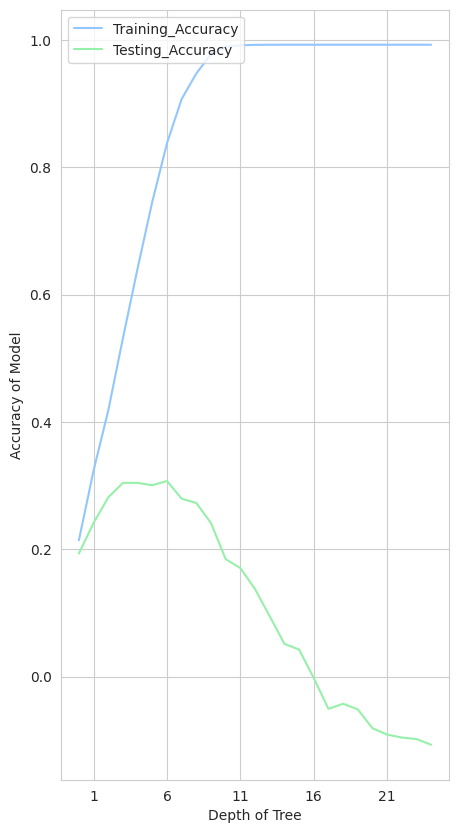

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

train_accuracy=[]
test_accuracy=[]

for i in range(1,26):
    # Train the model
    model = GradientBoostingRegressor(n_estimators=100,max_depth=i, random_state=1)
    model.fit(X_train, y_train)

    # fit the regressor with X and Y data
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train,y_train))
    #print("The r2 score of Training dataset for linear model is",model.score(x_train,y_train))
    # Testing Test
    test_accuracy.append(model.score(X_test,y_test))
    #print('The r2 score of Testing Dataset for a linear model is', r2)

# plotting graph for finding optimal max_depth
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
plt.plot(train_accuracy,label='Training_Accuracy')
plt.plot(test_accuracy,label='Testing_Accuracy')
plt.xticks(range(1,26,5))
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy of Model')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#  from the graph, we find optimal max_depth of Tree is 5
# so, let's build Gradient boost Model with max_depth as 5

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

# Train the model
model = GradientBoostingRegressor(n_estimators=200,max_depth=4, random_state=1)
model.fit(X_train, y_train)

# fit the regressor with X and Y data
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("The r2 score of Training data is",model.score(X_train,y_train))
# Testing Test
print('The r2 score of Testing datais', model.score(X_test,y_test))
#rmse
print('MSE ',MSE(y_test,y_pred,squared=False))

The r2 score of Training data is 0.6192453764542272
The r2 score of Testing datais 0.3029652609014212
MSE  0.2766344947229205


In [ ]:

results = results.append({'Model': 'GRADIENT BOOST REGRESSOR (manual)',
        'R2_train': train_r2,
        'R2_test': test_r2,
        'MSE': mse,
    }, ignore_index=True)
results

,Model,R2_train,R2_test,MSE
0,DecisionTree Regressor,0.349975,0.259132,0.081339
1,XGBOOST Regressor,0.349975,0.300559,0.076791
2,XGBOOST Regressor w/o Level feature,0.624775,0.319084,0.074757
3,XGBOOST RF Regressor,0.926825,0.283940,0.078615
4,XGBOOST RF Regressor W/O Level,0.939655,0.270240,0.080120
5,RANDOM FOREST Regressor,0.689011,0.340696,0.072384
6,RF Regressor W/O Level feature),0.610055,0.265529,0.080637
7,RF Regressor manual optimal features,0.770214,0.331352,0.073410
8,RF Regressor Manual W/O LEVEL,0.767194,0.330865,0.073464
9,GRADIENT BOOST REGRESSOR,0.849772,0.325945,0.074004


# **Among the above models,(Model No 5)RandomForest regressor with level feature performs well in terms of R-squared value and MSE **